<a href="https://colab.research.google.com/github/rlmsz/Algoritmo-de-Buscas-Python/blob/main/BuscaProfundidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 6), (2, 7), (3, 8), (3, 9), (4, 10), (4, 11), (5, 11), (5, 12), (5, 6), (6, 12), (7, 13), (8, 13), (8, 14), (10, 15), (11, 16), (11, 17), (12, 17), (12, 18), (13, 19), (14, 19), (15, 20), (16, 20), (17, 18), (18, 21), (19, 21), (20, 21)]
Qual o Nó Inicial? 0
Qual o Nó Objetivo? 21
Na Fila:  [0]
Nó atual:  0
Vizinhos Nó Atual:  [1, 2, 3]
Na Fila:  [1, 2, 3]
Nó atual:  3
Vizinhos Nó Atual:  [0, 8, 9]
Na Fila:  [1, 2, 8, 9]
Nó atual:  9
Vizinhos Nó Atual:  [3]
Na Fila:  [1, 2, 8]
Nó atual:  8
Vizinhos Nó Atual:  [3, 13, 14]
Na Fila:  [1, 2, 13, 14]
Nó atual:  14
Vizinhos Nó Atual:  [8, 19]
Na Fila:  [1, 2, 13, 19]
Nó atual:  19
Vizinhos Nó Atual:  [13, 14, 21]
Na Fila:  [1, 2, 13, 21]
Nó atual:  21
Nós Visitados:  {0, 3, 8, 9, 14, 19, 21}
Nó objetivo:  19
Nó objetivo:  14
Nó objetivo:  8
Nó objetivo:  3
Nó objetivo:  0
---------------------------------
Caminho Resultante:  [0, 3, 8, 14, 19, 21]


<ipython-input-1-b6588c885fbe>:138: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


O Custo do caminho é: 54


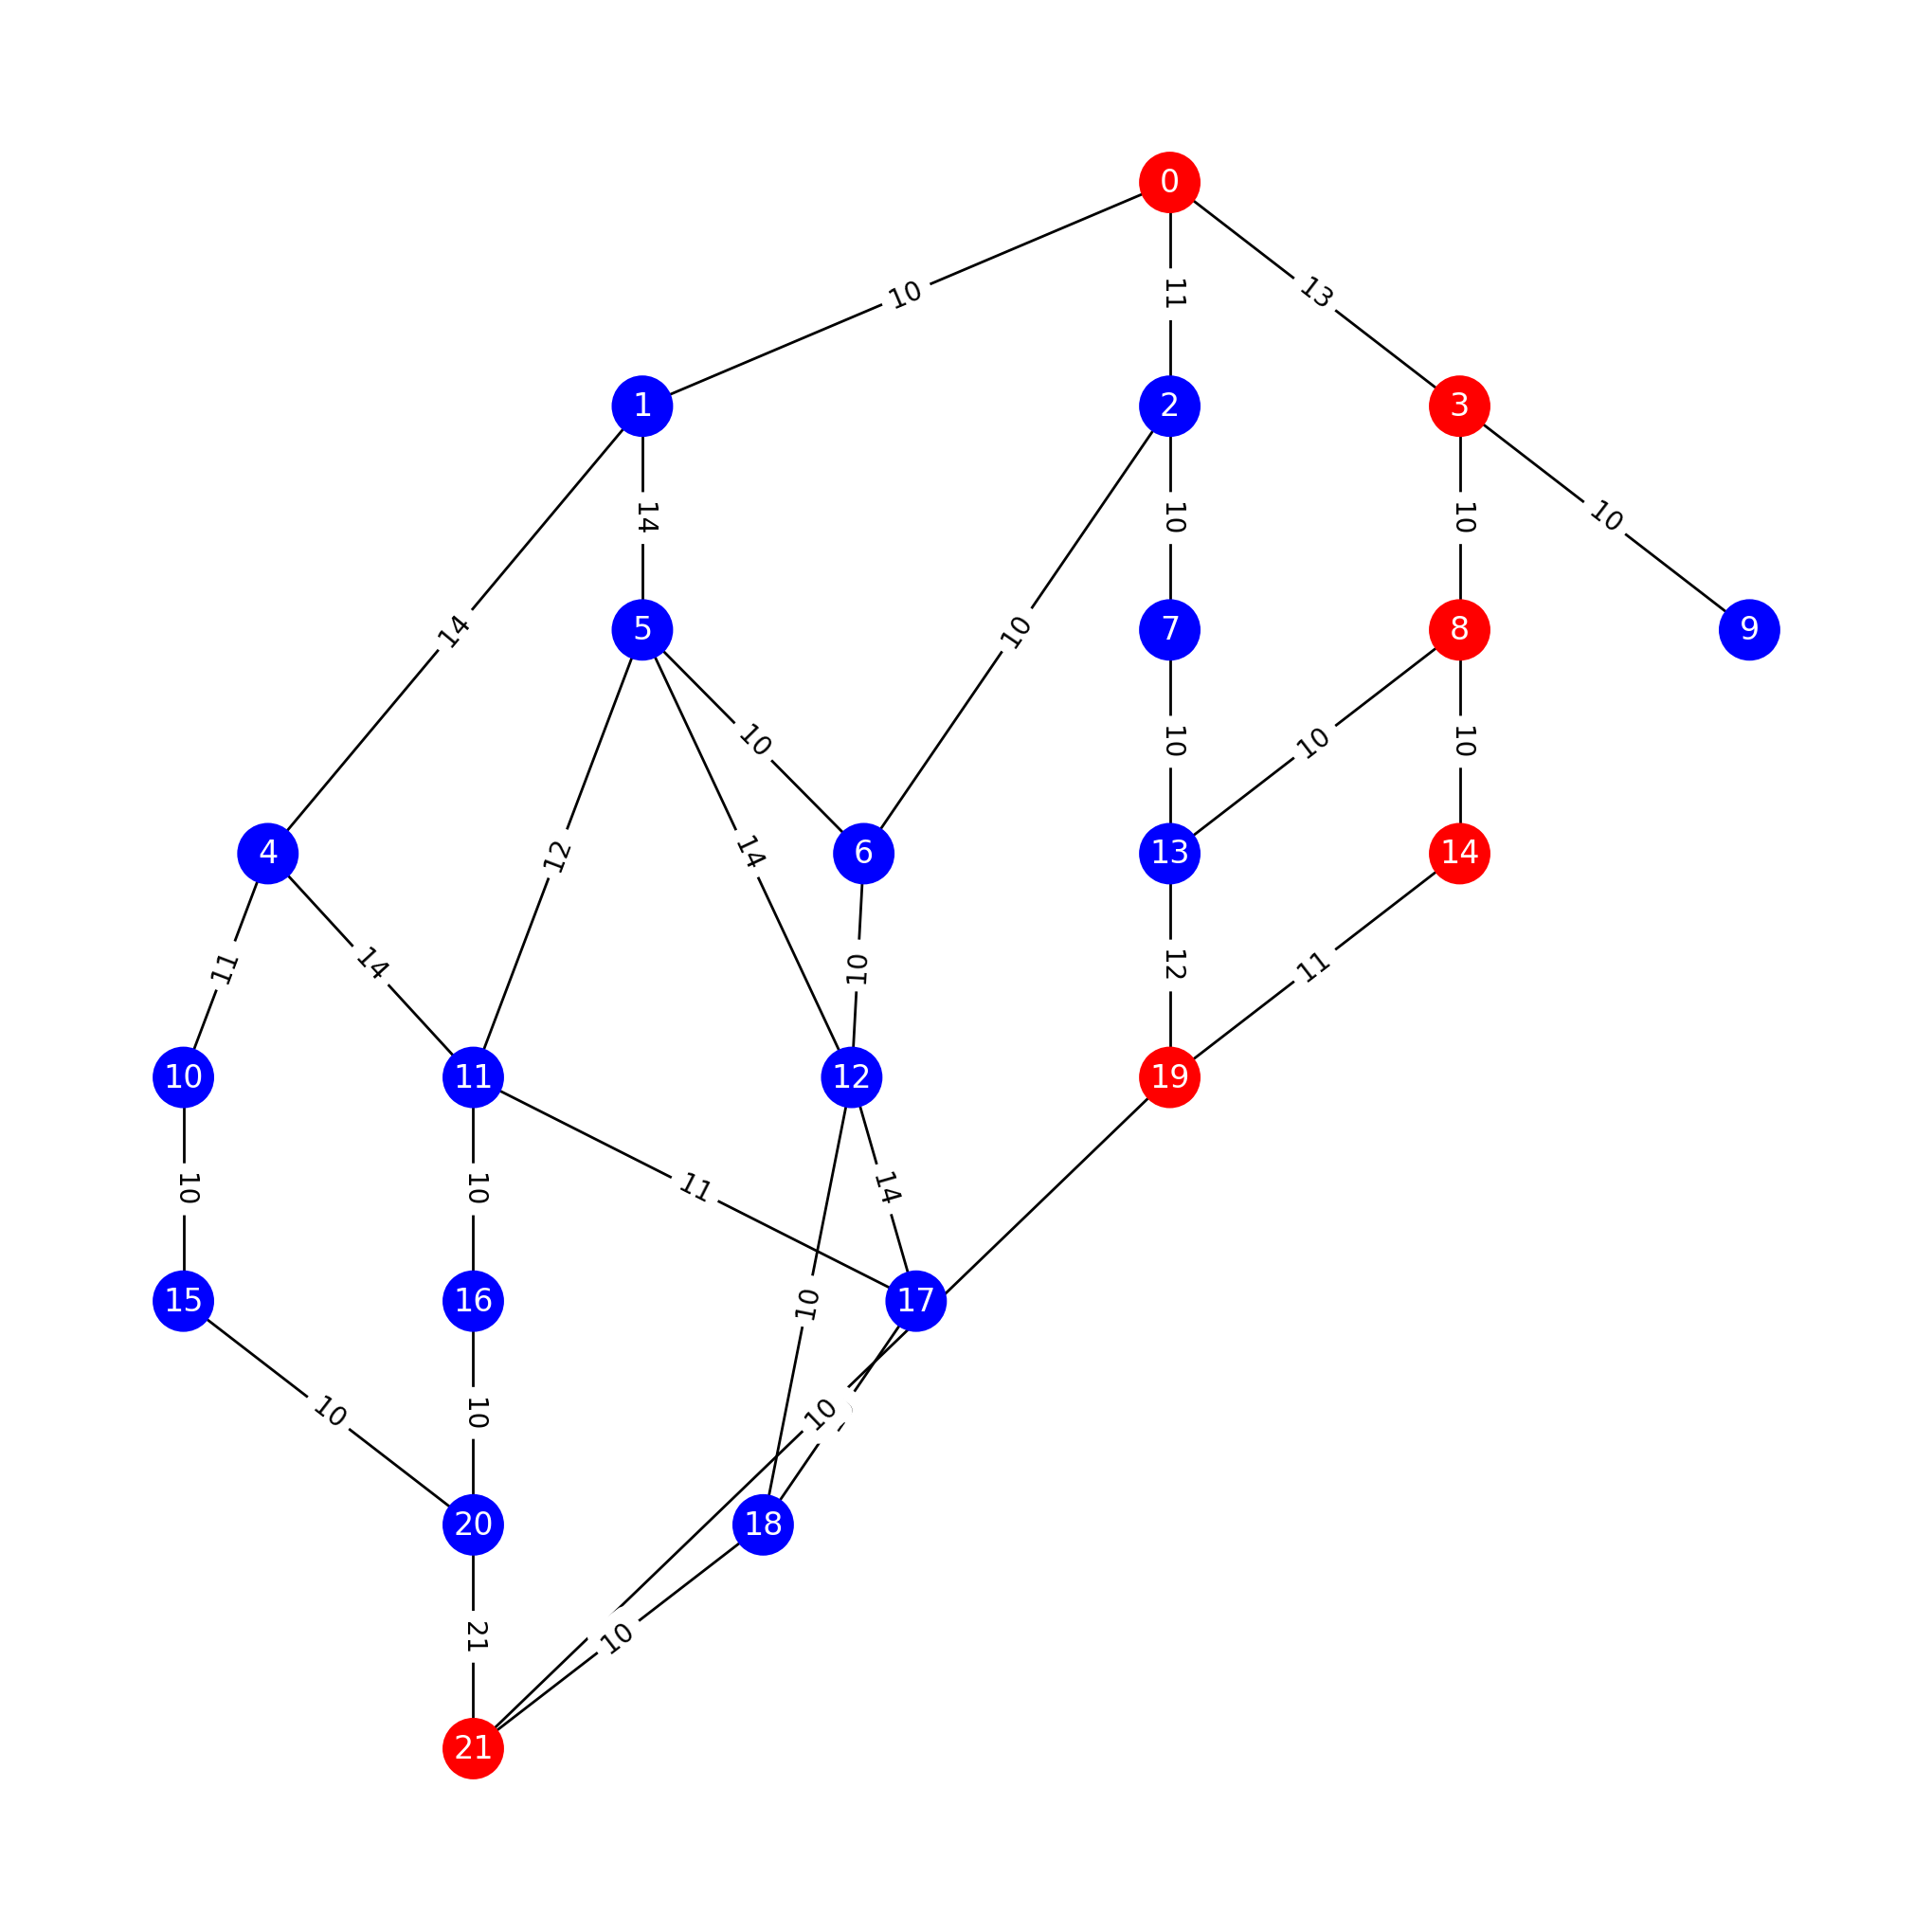

In [1]:
from queue import Queue
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
from networkx import *

#Inserção Mapa 
graph = {
    0: [1, 2, 3],
    1: [0, 4, 5],
    2: [0, 6, 7],
    3: [0, 8, 9],
    4: [1, 10, 11],
    5: [1, 6, 11, 12],
    6: [2, 5, 12],
    7: [2, 13],
    8: [3, 13, 14],
    9: [3],
    10: [4, 15],
    11: [4, 16, 17],
    12: [5, 6, 17, 18],
    13: [7, 8, 19],
    14: [8, 19],
    15: [10, 20],
    16: [11, 20],
    17: [11, 12, 18],
    18: [12, 17, 21],
    19: [13, 14, 21],
    20: [15, 16, 21],
    21: [18,19,20],

}

G = nx.Graph()
G.add_nodes_from(graph.keys())
# Add conexões e custos 
G.add_edge(0 , 1 ,weight = 10,minlen=4)
G.add_edge(0 , 2 ,weight = 11 ,minlen=4)
G.add_edge(0 , 3 ,weight = 13 ,minlen=4)
G.add_edge(1 , 4 ,weight = 14,minlen=4 )
G.add_edge(1 , 5 ,weight = 14,minlen=4 )
G.add_edge(2 , 6 ,weight = 10 ,minlen=4)
G.add_edge(2 , 7 ,weight = 10,minlen=4)
G.add_edge(3 , 8 ,weight = 10 ,minlen=4)
G.add_edge(3 , 9 ,weight = 10 ,minlen=4)
G.add_edge(4 , 10 ,weight = 11 ,minlen=4)
G.add_edge(4 , 11 ,weight = 14 ,minlen=4)
G.add_edge(5 , 11 ,weight = 12 ,minlen=4)
G.add_edge(5 , 12 ,weight = 14 ,minlen=4)
G.add_edge(5 , 6 ,weight = 10 ,minlen=4)
G.add_edge(6 , 12 ,weight = 10 ,minlen=4)
G.add_edge(7 , 13 ,weight = 10 ,minlen=4)
G.add_edge(8 , 13 ,weight = 10 ,minlen=4)
G.add_edge(8 , 14 ,weight = 10 ,minlen=4)
G.add_edge(10 , 15 ,weight = 10 ,minlen=4)
G.add_edge(11 , 16 ,weight = 10 ,minlen=4)
G.add_edge(11 , 17 ,weight = 11 ,minlen=4)
G.add_edge(12 , 17 ,weight = 14 ,minlen=4)
G.add_edge(12 , 18 ,weight = 10 ,minlen=4)
G.add_edge(13 , 19 ,weight = 12 ,minlen=4)
G.add_edge(14 , 19 ,weight = 11 ,minlen=4)
G.add_edge(15 , 20 ,weight = 10 ,minlen=4)
G.add_edge(16 , 20 ,weight = 10 ,minlen=4)
G.add_edge(17 , 18 ,weight = 10 ,minlen=4)
G.add_edge(18 , 21 ,weight = 10 ,minlen=4)
G.add_edge(19 , 21 ,weight = 10 ,minlen=4)
G.add_edge(20 , 21 ,weight = 21 ,minlen=4)







print(G.edges())


def DFS(graph, nó_inicial, nó_objetivo):
    visitados = set()
    listavisitados = set()  
    pilha = []

    # Add Nó Inicial na lista de visitados 
    visitados.add(nó_inicial)
    listavisitados.add(nó_inicial)

    # Nó Inicial não tem Pai
    Pai = dict()
    Pai[nó_inicial] = 'Sem Pai'

    # dfs
    caminho_found = False
    pilha.append(nó_inicial)
    while len(pilha) > 0:
        print('Na Fila: ',pilha)
        nó_atual = pilha.pop()
        print('Nó atual: ', nó_atual)
        listavisitados.add(nó_atual)
        if nó_atual == nó_objetivo:
            print("Nós Visitados: ", listavisitados)
            caminho_found = True
            break
        else:
                print('Vizinhos Nó Atual: ', graph[nó_atual])
                for next_node in graph[nó_atual]:
                  if next_node not in visitados:
                     visitados.add(next_node)
                     pilha.append(next_node)
                     Pai[next_node] = nó_atual

     # Caminho
    caminho = []
    if caminho_found:
        # add nó objetivo
        caminho.append(nó_objetivo)
        while Pai[nó_objetivo] != 'Sem Pai':
            caminho.append(Pai[nó_objetivo])
            nó_objetivo = Pai[nó_objetivo]
            print('Nó objetivo: ', nó_objetivo)
        caminho.reverse()
    return caminho



caminho = DFS(graph, int(input("Qual o Nó Inicial? ")), int(input("Qual o Nó Objetivo? ")))
print('---------------------------------')
print('Caminho Resultante: ', caminho)

colors = []
for node in G.nodes():
    if node in [n for n in caminho]:
        colors.append('red')
    else:
        colors.append('blue')

plt.figure(figsize=(10,10),dpi = 200)
pos = graphviz_layout(G, prog="dot")
nx.draw(G,pos, with_labels=True, node_size=500, font_color='w'
        , node_color=colors)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

print("O Custo do caminho é: "+ str(path_weight(G, caminho,"weight")))

plt.show()